In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

In [3]:
mnist = keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train_full = X_train_full[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [0]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [6]:
X_train_full.shape

(60000, 28, 28, 1)

In [0]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## CNN

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,7,activation="relu",padding="SAME",input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(128,3,activation="relu",padding="SAME"))
model.add(keras.layers.Conv2D(128,3,activation="relu",padding="SAME"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(256,3,activation="relu",padding="SAME"))
model.add(keras.layers.Conv2D(256,3,activation="relu",padding="SAME"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))

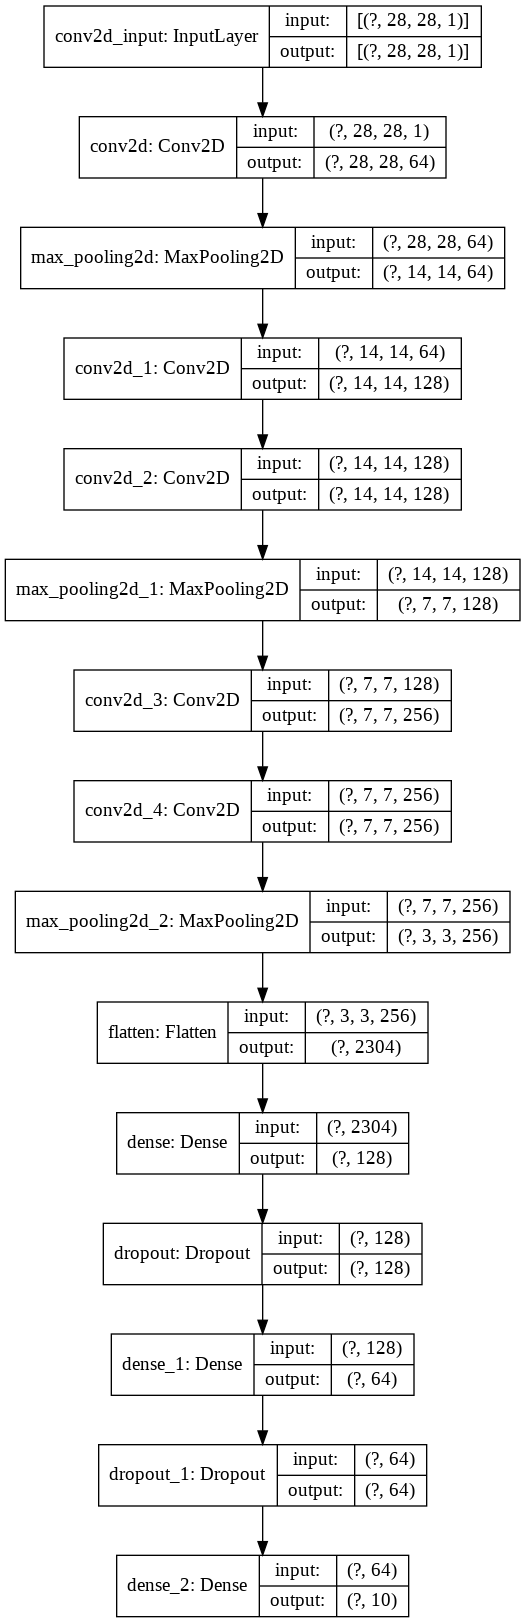

In [9]:
keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

In [0]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4381 - accuracy: 0.8615
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1254 - accuracy: 0.9703
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0881 - accuracy: 0.9788
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0735 - accuracy: 0.9824
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0614 - accuracy: 0.9851
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0565 - accuracy: 0.9869
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0494 - accuracy: 0.9889
Epoch 8/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0476 - accuracy: 0.9895
Epoch 9/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0463 - accuracy: 0.9895
Epoch 10/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.041

In [12]:
model.evaluate(X_valid,y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9906


[0.05702601745724678, 0.9905999898910522]

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0601 - accuracy: 0.9914


[0.06005016714334488, 0.9914000034332275]